# Turning Our Code into a Codebase

### Introduction 

In the last lesson, we saw how we could use function arguments to build flexibility into our codebase.  For example, we built a `plot_with_labels` function that allowed us to easily plot our data.

In [36]:
def plot_with_labels(y_values, hovertext_labels):
    scatter = go.Scatter(y = y_values, hovertext = hovertext_labels, mode = 'markers')
    fig = go.Figure(data = scatter)
    return fig

For example, the with the `plot_with_labels` function, we can now pass through our data of `y_values` and `hover_labels` when we execute the function, and thus pass through different values each time.

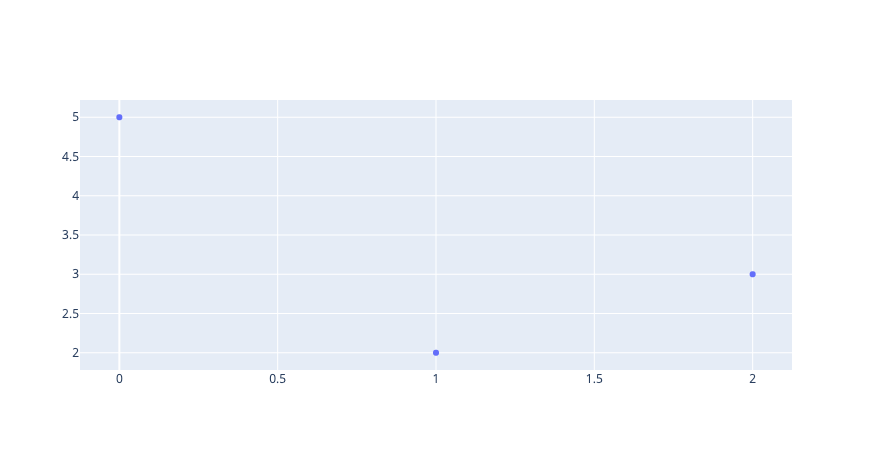

In [86]:
plot_with_labels([5, 2, 3], ['new york', 'philadelphia', 'chicago'])

In this lesson, we'll change our earlier functions so that they become more flexible.  You are not expected to know all of the changes we can make to our functions right away.  That comes with practice.  But if you can follow along with this reading, and understand most of the code at the end, you are in great shape.  

## Get Data from Many Pages

In [89]:
import IPython.display as ipd
base_url = "https://storage.googleapis.com/curriculum-assets/curriculum-assets.nosync/mom-files/"

ipd.Audio(base_url + "gather_data_fn.wav")

Now let's take a look at our function for gathering a list of dictionaries from our Wikipedia page on US cities.

In [40]:
def gather_cities():
    url = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'
    tables = pd.read_html(url)
    cities_table = tables[4]
    cities = cities_table.to_dict('records')
    return cities

If we use function arguments, we can change this code so that it cannot only gather data from our Wikipedia page, but from any webpage that has tables on it.

What part of the function should we change to being a function argument?

This time let's start with the `url`.

> Oftentimes good candidates for function arguments is are our hardcoded strings or numbers, as these are the parts of the method that we want to make more flexible.

Also note that we changed the function name from `gather_cities` to `gather_data`.

In [62]:
def gather_data(url):
    tables = pd.read_html(url)
    cities_table = tables[4]
    cities = cities_table.to_dict('records')
    return cities

> Press shift + enter on the code above.

So now we can provide the url as an argument can and decide each time we execute the function what url to gather data from.

In [65]:
url = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'

cities = gather_data(url)

Great so this code still works, we just now provide the url when we execute the function.  If we look at the line `cities_table = tables[4]`, this line is there because pandas finds all of the tables on the webpage, and the important table with the city populations happened to be the fifth one.  But with other webpages, we may want to select other tables.  So we should probably replace `tables[4]` to use an argument.  While we're at it, we'll make the rest of our function more generic by removing the word `cities`, as now our function can tables from any webpage.

In [67]:
def gather_data(url, table_idx):
    tables = pd.read_html(url)
    table = tables[table_idx]
    list_of_dictionaries = table.to_dict('records')
    return list_of_dictionaries

> Press shift + enter on the cell above.

Ok, now let's use a function argument to gather data from the Wikipedia page on Spotify.

In [68]:
spotify_url = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"

songs = gather_data(spotify_url, 4)
songs[:2]

[{'Rank': '1',
  'Song': '"Rockstar"',
  'Artist(s)': 'Post Malone featuring 21 Savage',
  'Days at No. 1': '113',
  'Date published': '15 September 2017',
  'Date achieved': '11 January 2018'},
 {'Rank': '2',
  'Song': '"Señorita"',
  'Artist(s)': 'Shawn Mendes and Camila Cabello',
  'Days at No. 1': '102',
  'Date published': '21 June 2019',
  'Date achieved': '3 October 2019'}]

Ok, let's keep moving! 

### Updating our Get Values Method

In [88]:
base_url = "https://storage.googleapis.com/curriculum-assets/curriculum-assets.nosync/mom-files/"
import IPython.display as ipd
ipd.Audio(base_url + "get_values_change.wav")

Now remember we ended the last lesson, so that we can retreive value of data from our list of cities.

In [69]:
def get_values(key):
    values = []

    for each_city in cities:
        value = each_city[key]
        values.append(value)
    return values

In [72]:
pops = get_values('2018estimate')
pops[:6]

[8398748, 3990456, 2705994, 2325502, 1660272, 1584138]

So it would be great if this function automatically worked with our list of song dictionaries as well.  Will it?

Well, no.  The problem is the line `for each_city in cities`, that last word `cities`, looks for a variable named `cities` defined elsewhere in our notebook.  The function then moves through each city, adding the specified value to the `values` list.  We want our function to be flexible about the list of dictionaires that it moves through.  Sometimes we'll want it to move through `cities`.  Othertimes we'll want it to move through `songs`.  Sounds like we need to replace `cities` with an argument.

In [75]:
def get_values(list_of_dictionaries, key):
    values = []

    for dictionary in list_of_dictionaries:
        value = dictionary[key]
        values.append(value)
    return values

Now we are in quite good shape.

In [76]:
artists = get_values(songs, 'Artist(s)')

In [77]:
days_at_top = get_values(songs,'Days at No. 1')

In [78]:
days_at_top[:2]

['113', '102']

In [79]:
artists[:2]

['Post Malone featuring 21 Savage', 'Shawn Mendes and Camila Cabello']

Let's copy in our `plot_with_labels` function from the earlier lesson and plot our songs.

In [83]:
import plotly.graph_objects as go

def plot_with_labels(y_values, labels):
    scatter = go.Scatter(y = y_values, hovertext = labels, mode = 'markers')
    fig = go.Figure(data = scatter)
    return fig

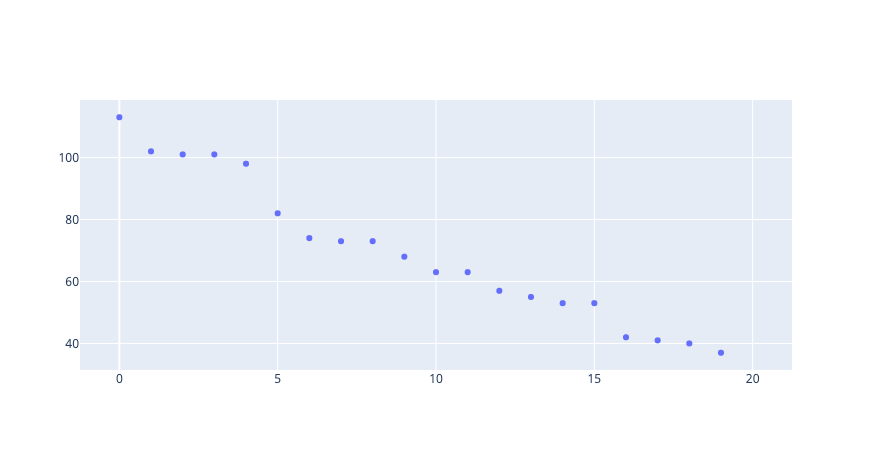

In [82]:
plot_with_labels(days_at_top, artists)

### Summary

Ok!  So this is your codebase for gathering data from a webpage that has tables on it.  If you want to change it, it's just code, so experiment with it and give it a try.  

More importantly, you now have the skills to keep going with your coding journey.  We'll have an intro to machine learning course out shortly, that you'll be more than qualified to work through.  Or if you're in New York, check out any of our [free meetup workshops](https://www.meetup.com/data-Workshops/) or part-time coding and data science courses.

Feel free to email me at `jeff@jigsawlabs.io` if you have any questions or suggestions about the material.

### Your codebase

If you can understand even fifty percent of the code below, you are in great, great shape.  If you find yourself struggling, try passing different values to the functions to see how each one works.  Best of luck!

In [59]:
spotify_url = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"

songs = gather_data(spotify_url)
song_names = get_values_for(songs, 'Song')
days_at_top = get_values_for(songs, 'Days at No. 1')
# plot_with_labels(days_at_top, song_names)

In [84]:
def gather_data(url, table_number):
    tables = pd.read_html(url)
    cities_table = tables[table_number]
    cities = cities_table.to_dict('records')
    return cities

def get_values_for(list_of_dictionaries , specified_key):
    values = []

    for dictionary in list_of_dictionaries:
        dict_val = dictionary[specified_key]
        values.append(dict_val)
    return values

def plot_with_labels(y_values, labels):
    scatter = go.Scatter(y = y_values, hovertext = labels, mode = 'markers')
    fig = go.Figure(data = scatter)
    return fig

<center>
<a href="https://www.jigsawlabs.io/free" style="position: center"><img src="https://storage.cloud.google.com/curriculum-assets/curriculum-assets.nosync/mom-files/jigsaw-labs.png" width="15%" style="text-align: center"></a>
</center>